In [1]:
import mne
import numpy as np
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [2]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('EyeContact1.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.56it/s]


1     2     3     4      5     6      7     8     9    10  ...    12  \
0  70.2 -6.14 -9.27 -5.44 -10.20  55.6 -10.30 -19.4 -20.5 -16.5  ... -21.8   
1  70.2 -6.90 -8.38 -5.38  -9.11  55.8  -9.14 -17.8 -18.9 -14.9  ... -24.8   
2  70.2 -8.32 -8.12 -5.70  -8.76  55.8  -8.68 -17.0 -18.0 -13.9  ... -26.5   

     13    14    15    16    17    18    19    20    21  
0 -26.5 -22.6 -18.5 -25.9 -22.7 -18.3 -19.8 -17.8 -72.0  
1 -29.2 -26.4 -22.0 -28.3 -25.3 -20.4 -21.9 -20.5 -72.9  
2 -30.6 -28.7 -24.2 -29.6 -26.6 -21.4 -22.6 -21.8 -73.9  

[3 rows x 21 columns]

In [3]:
# Assuming you already have a DataFrame called 'df' with 21 columns

# Define the column ranges for Participant 1 and Participant 2
participant1_columns = range(2, 11)
participant2_columns = range(12, 21)

# Create separate DataFrames for Participant 1 and Participant 2
df_participant1 = df.iloc[:, participant1_columns].copy()
df_participant2 = df.iloc[:, participant2_columns].copy()

# Define the new column names for Participant 1 & 2
participant1_new_column_names = [
    'F3',
    'Fz',
    'F4',
    'C3',
    'Cz',
    'C4',
    'P3',
    'Pz',
    'P4',
]


# Assign the new column names to Participant 1 DataFrame
df_participant1.columns = participant1_new_column_names

# Assign the new column names to Participant 2 DataFrame
df_participant2.columns = participant1_new_column_names

# Print the Participant 1 DataFrame
print("Participant 1 DataFrame:")
df_participant1



Participant 1 DataFrame:


F3    Fz      F4     C3     Cz    C4     P3    Pz    P4
0     -9.27 -5.44 -10.200  55.60 -10.30 -19.4 -20.50 -16.5 -98.5
1     -8.38 -5.38  -9.110  55.80  -9.14 -17.8 -18.90 -14.9 -98.6
2     -8.12 -5.70  -8.760  55.80  -8.68 -17.0 -18.00 -13.9 -98.7
3     -8.29 -6.26  -8.950  55.40  -8.79 -17.1 -17.70 -13.4 -98.8
4     -8.60 -6.96  -9.380  55.10  -9.19 -17.5 -17.80 -13.5 -98.8
...     ...   ...     ...    ...    ...   ...    ...   ...   ...
23961  3.48  5.14  -1.830   9.76   2.36 -16.3  -6.15 -10.1  82.8
23962  3.71  5.32  -1.580   9.81   2.51 -16.1  -6.42 -10.1  82.8
23963  4.25  5.78  -1.130  10.30   2.82 -15.7  -6.54 -10.1  82.8
23964  4.65  6.12  -0.899  10.90   2.86 -15.8  -7.01 -10.5  82.8
23965  4.84  6.28  -1.000  11.50   2.49 -16.4  -8.00 -11.6  82.8

[23966 rows x 9 columns]

In [4]:
# Print the Participant 3 DataFrame
print("\nParticipant 2 DataFrame:")
df_participant2


Participant 2 DataFrame:


F3    Fz    F4    C3    Cz     C4    P3    Pz    P4
0     -26.5 -22.6 -18.5 -25.9 -22.7 -18.30 -19.8 -17.8 -72.0
1     -29.2 -26.4 -22.0 -28.3 -25.3 -20.40 -21.9 -20.5 -72.9
2     -30.6 -28.7 -24.2 -29.6 -26.6 -21.40 -22.6 -21.8 -73.9
3     -29.8 -28.3 -24.3 -28.8 -25.6 -20.60 -21.2 -20.9 -74.6
4     -27.5 -25.6 -22.8 -26.6 -22.9 -18.30 -18.3 -18.3 -75.0
...     ...   ...   ...   ...   ...    ...   ...   ...   ...
23961  18.3  17.9  24.2  18.1  20.3   9.12  13.5  15.3 -44.1
23962  21.3  21.1  28.0  21.0  23.5  12.50  17.2  18.9 -44.1
23963  23.5  23.5  30.8  23.1  25.8  15.00  20.0  22.0 -44.0
23964  24.1  24.2  31.8  23.7  26.5  15.80  21.2  23.5 -44.0
23965  23.0  23.1  31.0  22.7  25.5  15.20  20.9  23.5 -44.1

[23966 rows x 9 columns]

In [5]:
import mne
import pandas as pd


# Extract the channel names from the DataFrame columns
ch_names = participant1_new_column_names 

# Extract the data values from the DataFrame
data = df_participant1.values

# Create the channel types (assuming they are all 'eeg')
ch_types = ['eeg'] * len(ch_names)

# Define the sampling frequency of the data in Hz
sfreq = 1024

# Create the info object for the raw data
info = mne.create_info(ch_names, sfreq, ch_types)

# Create the raw object
raw1 = mne.io.RawArray(data.T, info)


Creating RawArray with float64 data, n_channels=9, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.


In [6]:
import mne
import pandas as pd


# Extract the channel names from the DataFrame columns
ch_names = participant1_new_column_names 

# Extract the data values from the DataFrame
data = df_participant2.values

# Create the channel types (assuming they are all 'eeg')
ch_types = ['eeg'] * len(ch_names)

# Define the sampling frequency of the data in Hz
sfreq = 1024

# Create the info object for the raw data
info = mne.create_info(ch_names, sfreq, ch_types)

# Create the raw object
raw2 = mne.io.RawArray(data.T, info)


Creating RawArray with float64 data, n_channels=9, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs
# pick the EEG channels for ICA
picks = mne.pick_types(raw1.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks for participant1
#n_components = 20
ica = ICA(random_state=0)
ica.fit(raw1, picks=picks)


Fitting ICA to data using 9 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 9 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_17756\2180611296.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw1, picks=picks)


Fitting ICA took 0.3s.


<ICA | raw data decomposition, method: fastica (fit in 14 iterations on 23966 samples), 9 ICA components (9 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=9, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.
Using matplotlib as 2D backend.


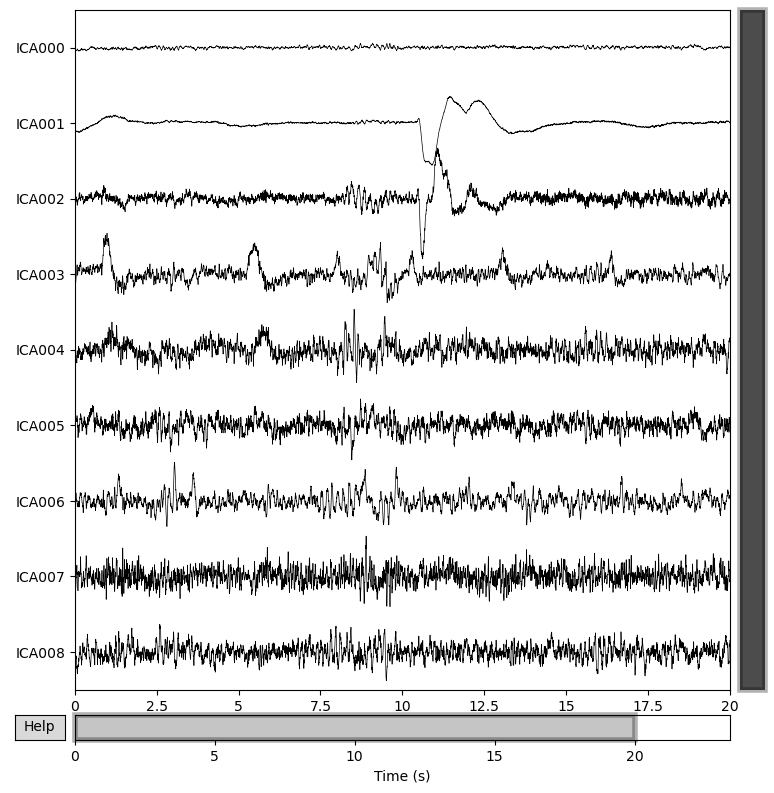

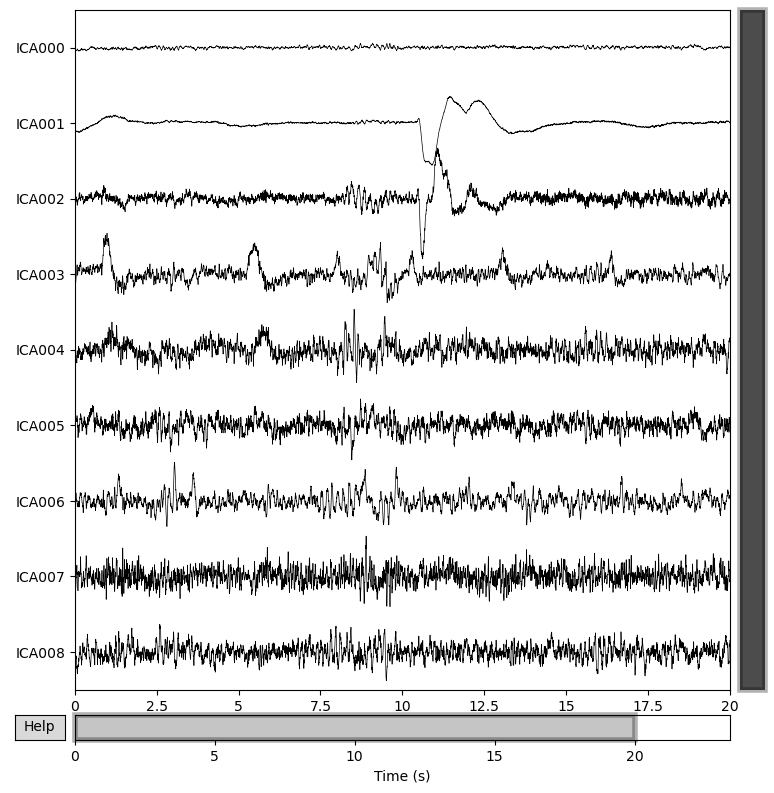

In [8]:
 ica.plot_sources(raw1, block=False)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs
# pick the EEG channels for ICA
picks = mne.pick_types(raw2.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
#n_components = 20
ica = ICA(random_state=0)
ica.fit(raw2, picks=picks)


Fitting ICA to data using 9 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 9 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_17756\370007711.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw2, picks=picks)


Fitting ICA took 7.0s.


C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 23966 samples), 9 ICA components (9 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=9, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.


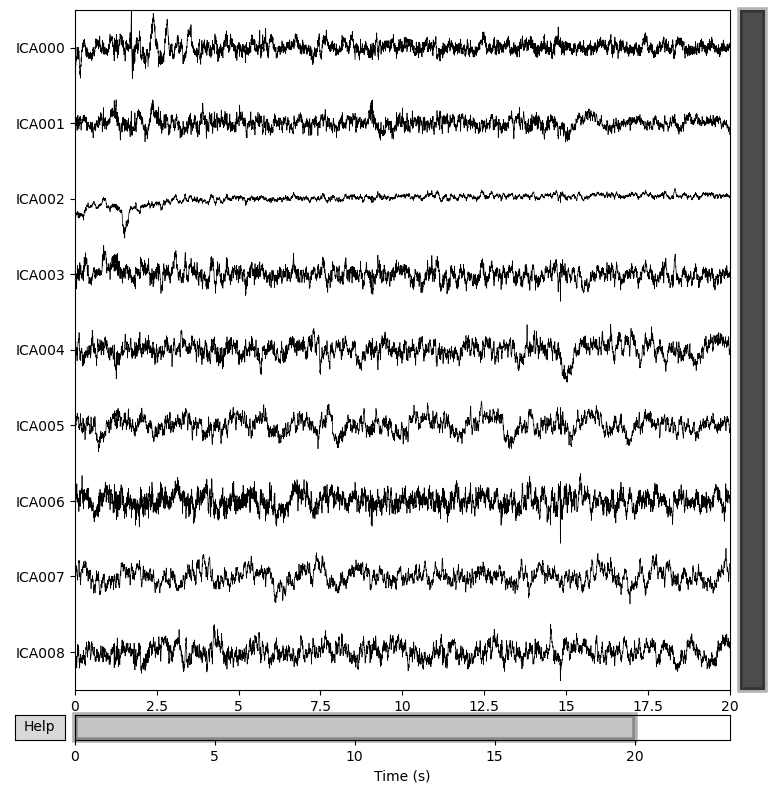

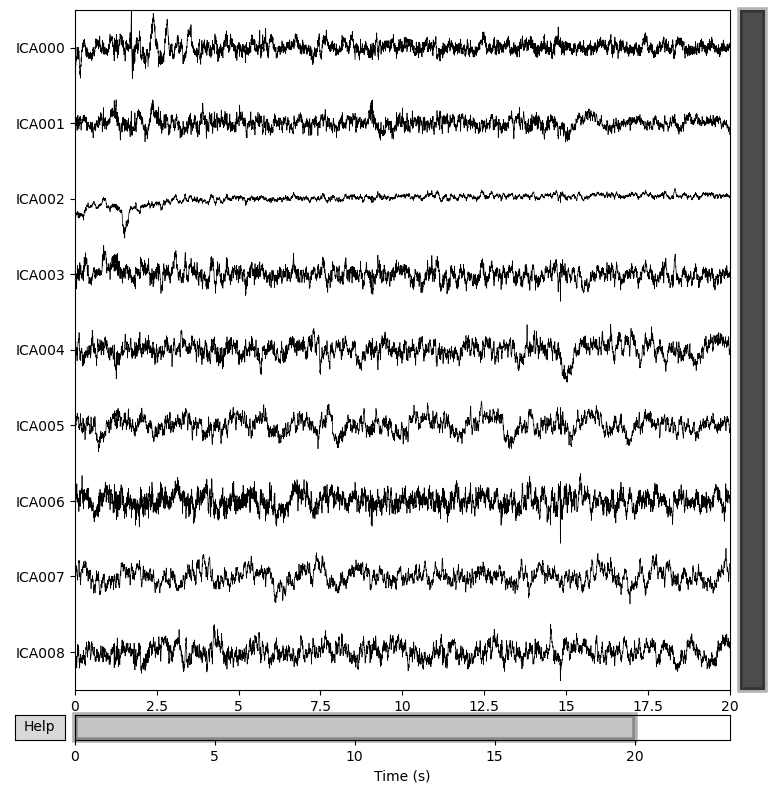

In [10]:
 ica.plot_sources(raw2, block=False)

### First particpant analysis EEG Data

 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


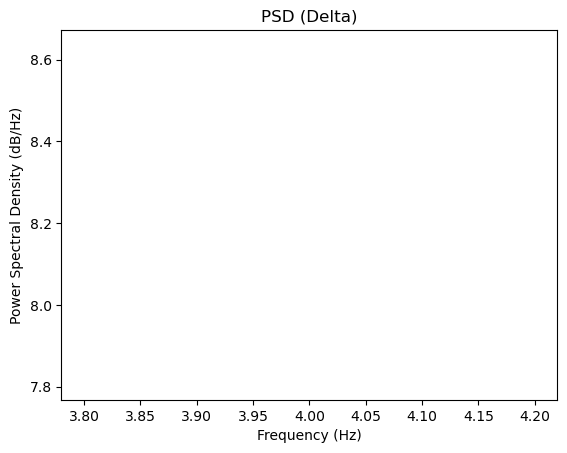

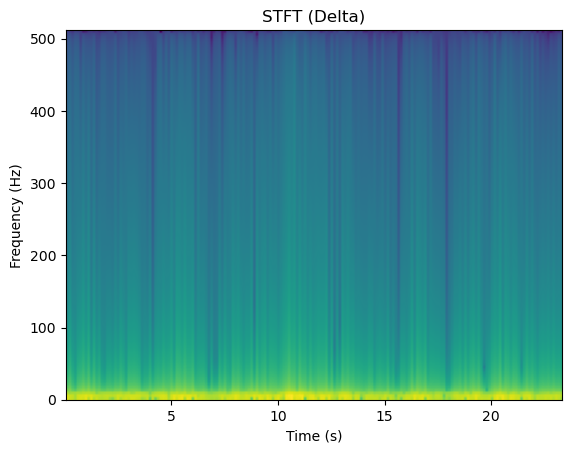

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


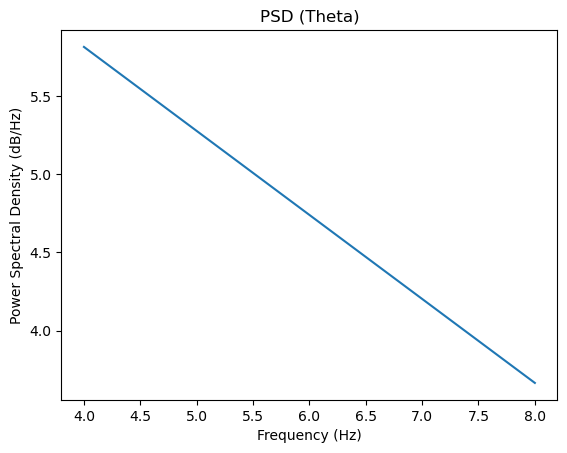

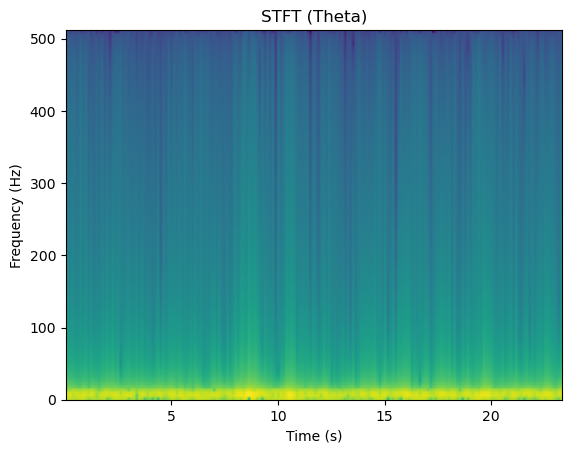

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


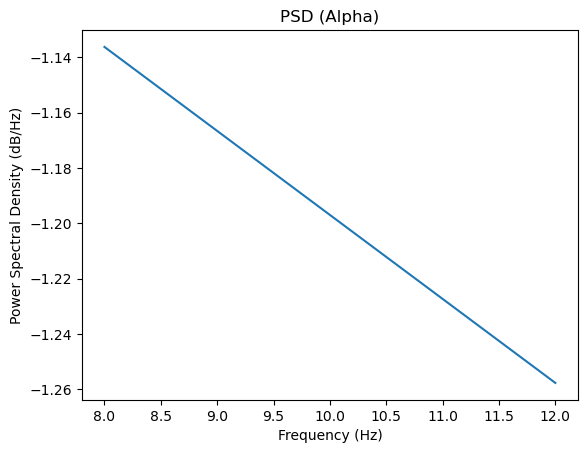

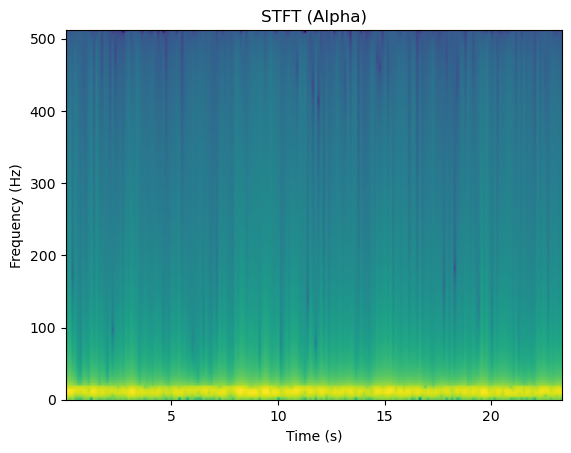

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


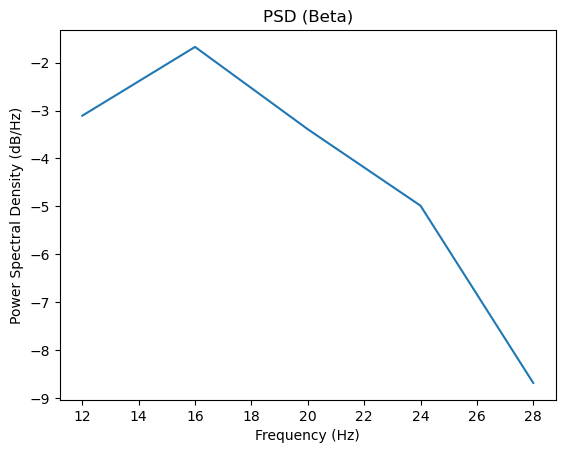

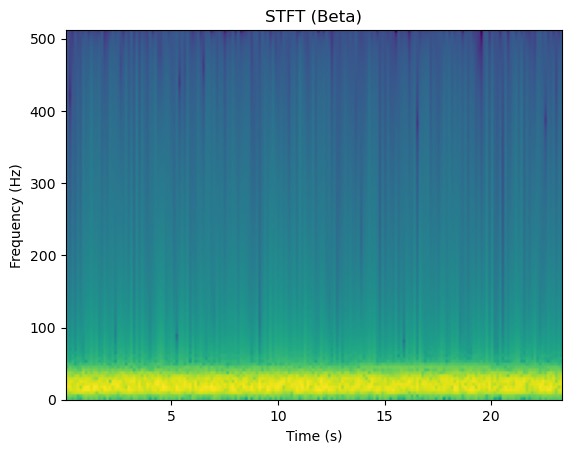

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


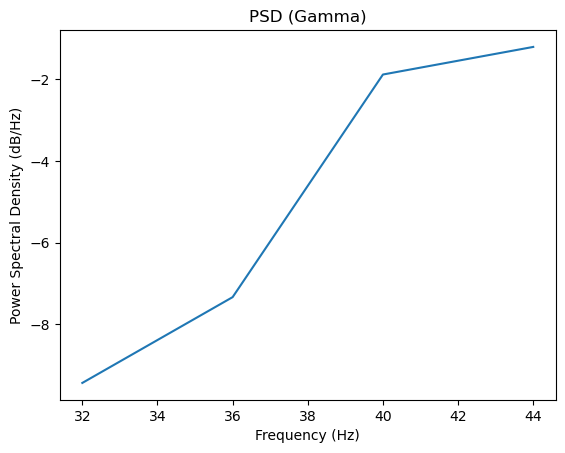

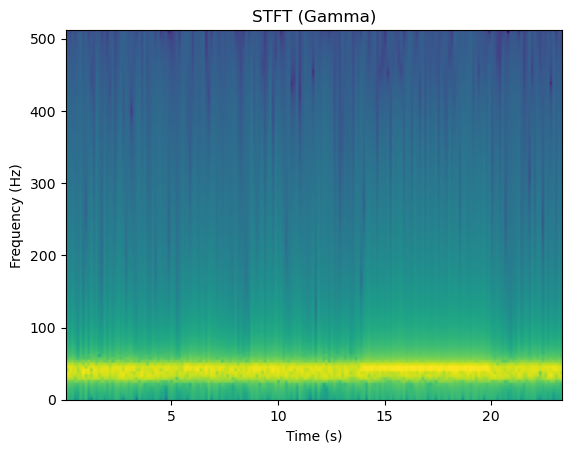

In [11]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw1.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

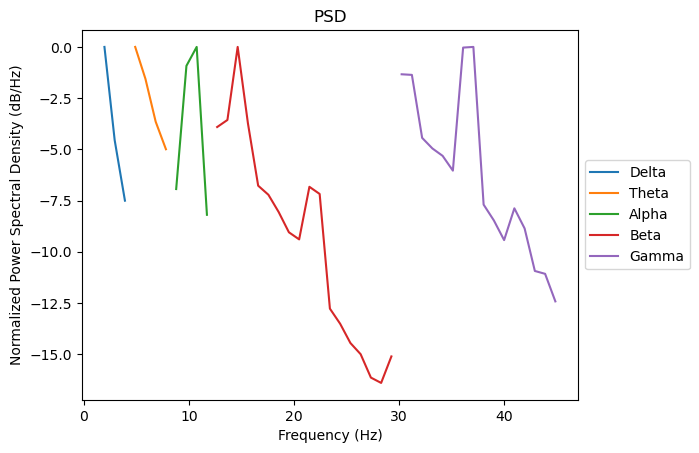

In [12]:
# Initialize the figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])

    # Convert the DataFrame to a numpy array
    data_array = df_participant1.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Normalize PSD by dividing by the sum of all PSD values
    normalized_psd = psd.mean(axis=0) / np.sum(psd.mean(axis=0))
    normalized_psd /= np.max(normalized_psd)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(normalized_psd), label=band, color=plt.cm.tab10(i))

# Add a legend and labels outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Show the figure
plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


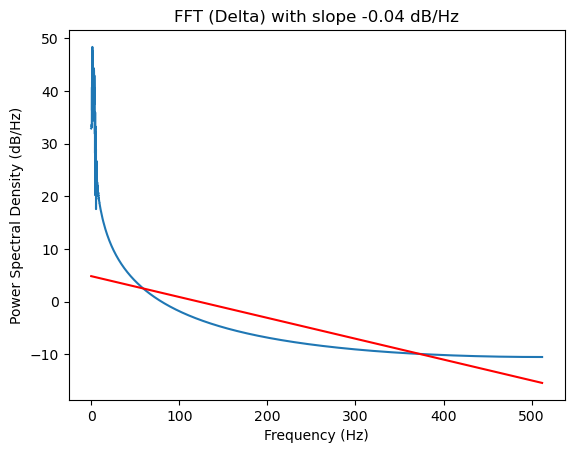

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


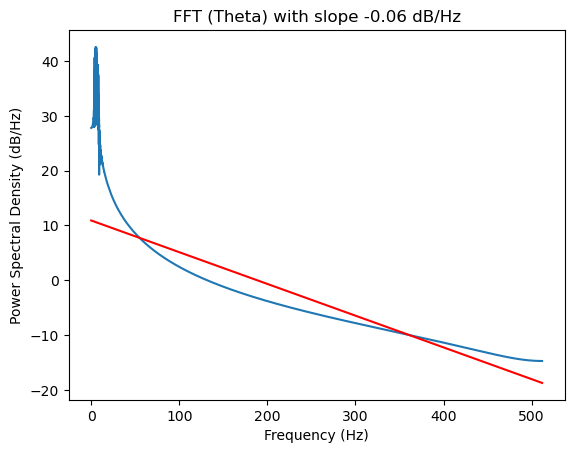

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


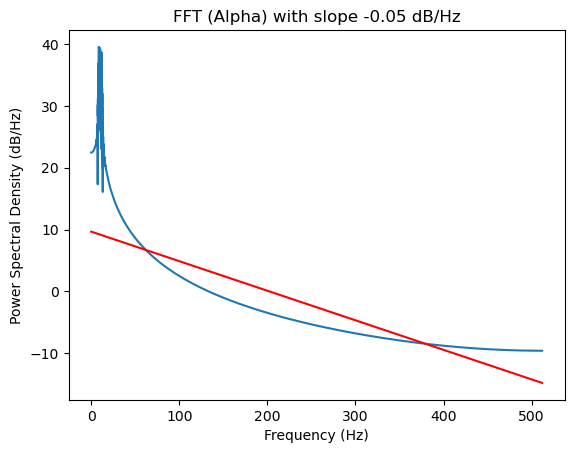

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


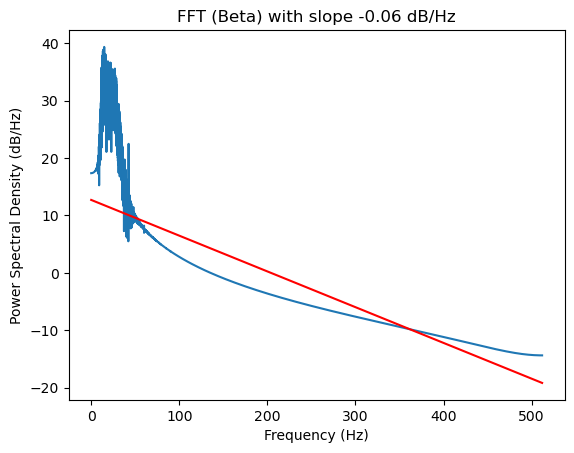

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


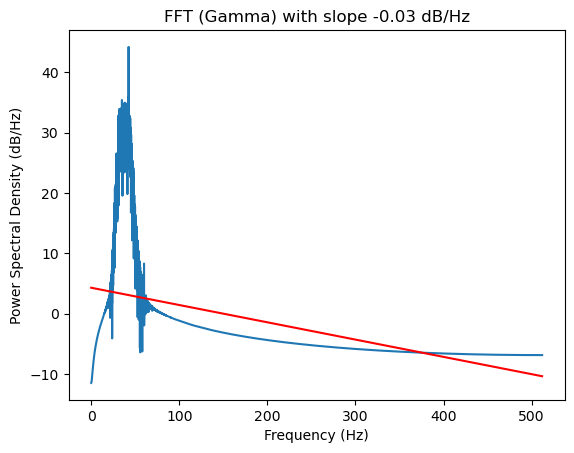

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw1.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

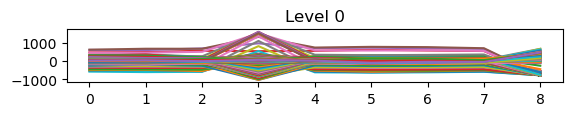

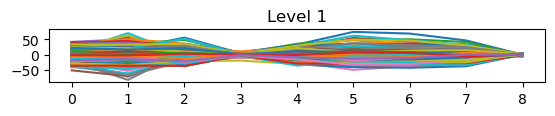

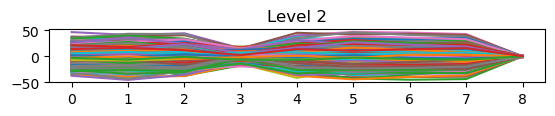

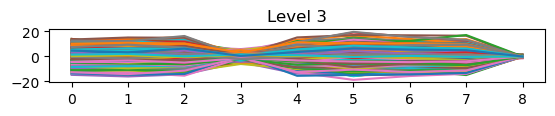

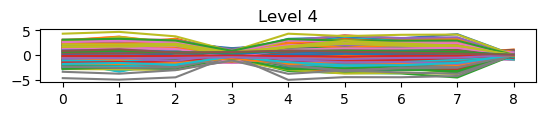

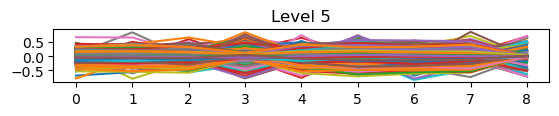

mean_spectrum: [7.78880670e+04 1.72544297e+02 1.23887845e+02 1.48407362e+01
 6.74025736e-01 1.09634188e-02]
var_spectrum: [2.69593479e+10 1.51453619e+04 3.30816226e+03 5.46015613e+01
 1.03901324e-01 1.00853506e-05]


In [14]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw1.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [15]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw1.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw1.ch_names), len(raw1.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw1.ch_names, columns=raw1.ch_names)

# Print the connectivity matrix in a neat format
df_causality


F3             Fz            F4            C3            Cz  \
F3   0.000000e+00   4.418609e-18  9.305787e-01  1.995049e-14  2.881662e-01   
Fz   1.756862e-04   0.000000e+00  9.327274e-01  7.087211e-12  7.151912e-01   
F4   8.467003e-01   3.012080e-01  0.000000e+00  3.316601e-15  9.949644e-01   
C3  1.133887e-276  1.082656e-256  0.000000e+00  0.000000e+00  0.000000e+00   
Cz   8.996801e-01   2.413843e-02  6.728320e-02  4.161222e-18  0.000000e+00   
C4   6.150871e-01   4.738267e-01  2.510976e-03  1.896638e-14  2.776686e-01   
P3   9.447124e-01   6.029127e-01  5.621902e-02  4.506738e-16  8.984552e-01   
Pz   8.859047e-01   1.975750e-01  4.163643e-02  2.705595e-16  3.887515e-01   
P4   4.709671e-73   6.799089e-57  2.572039e-57  2.644432e-02  1.252144e-64   

              C4            P3            Pz        P4  
F3  1.489411e-01  4.965769e-01  4.954785e-01  0.359869  
Fz  5.901490e-01  9.737835e-01  9.426435e-01  0.455487  
F4  9.844026e-04  1.781128e-01  3.444765e-01  0.473860  
C3  0.000000e+00  0.000000e+00  0.000000e+00  0.483981  
Cz  7.586773e-01  8.332701e-01  7.747184e-01  0.444981  
C4  0.000000e+00  1.512728e-01  1.102878e-03  0.427406  
P3  5.706846e-01  0.000000e+00  3.233039e-02  0.431778  
Pz  8.479203e-01  9.067327e-01  0.000000e+00  0.368678  
P4  2.819107e-41  4.178221e-53  1.136856e-60  0.000000

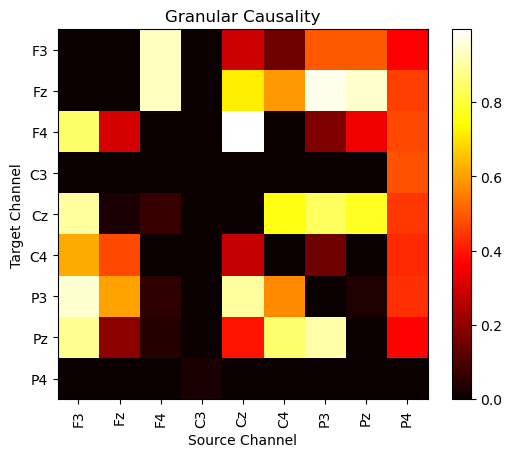

In [16]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw1.ch_names)), raw1.ch_names, rotation=90)
plt.yticks(np.arange(len(raw1.ch_names)), raw1.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()


### Second participant analysis EEG data

 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


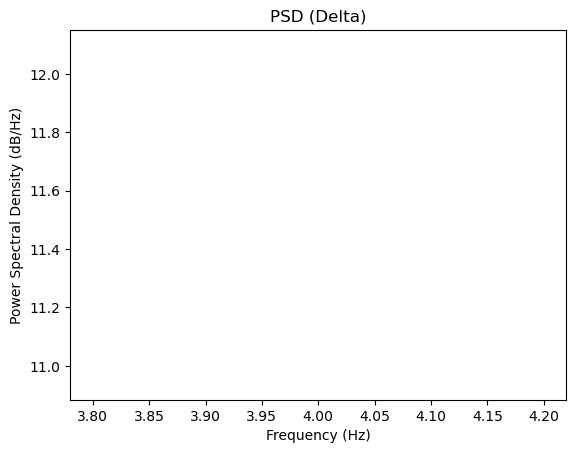

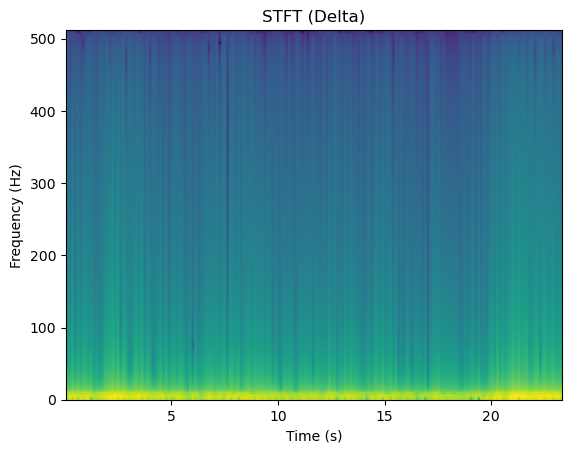

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


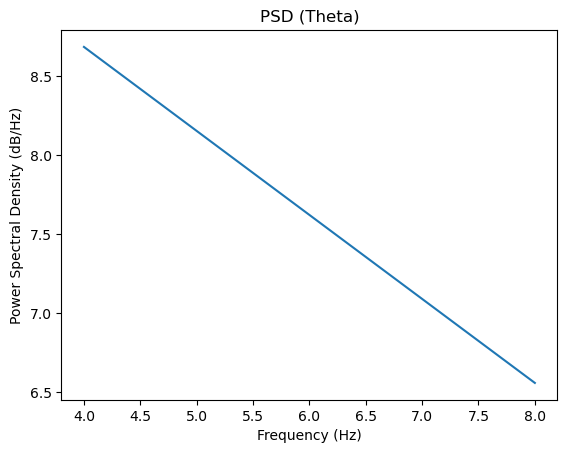

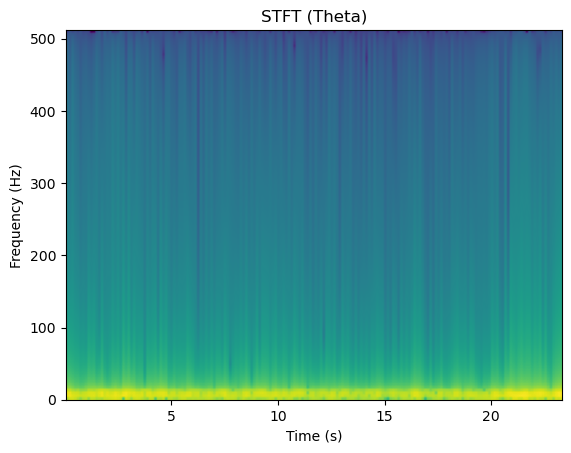

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


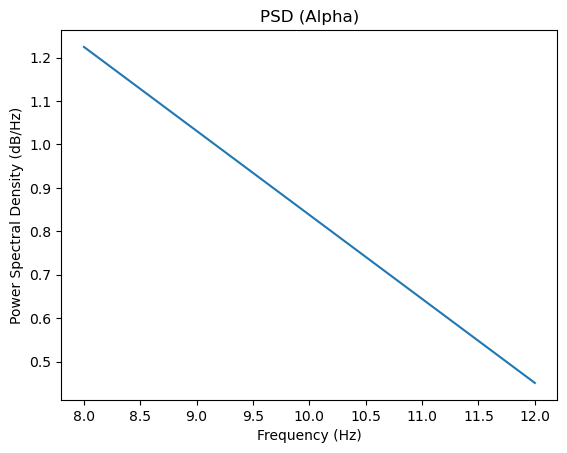

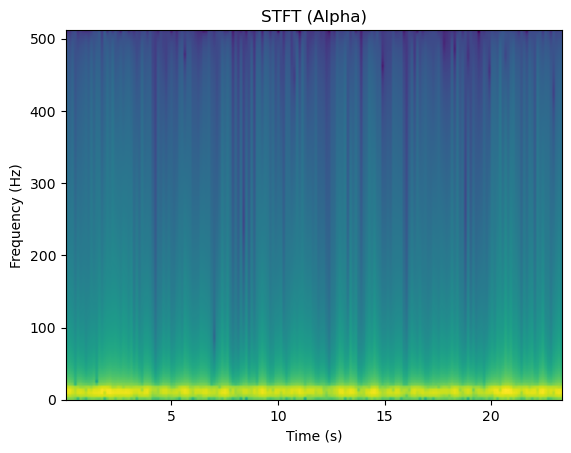

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


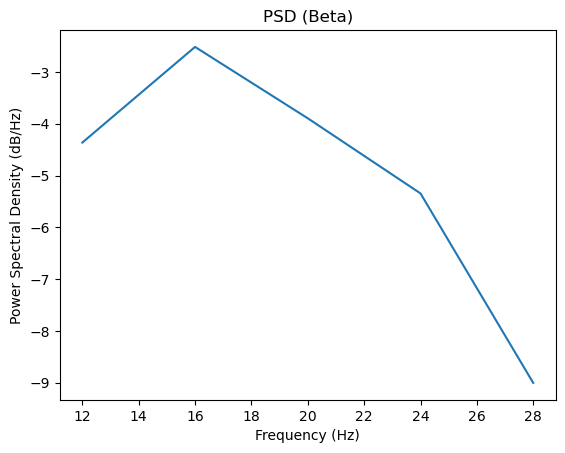

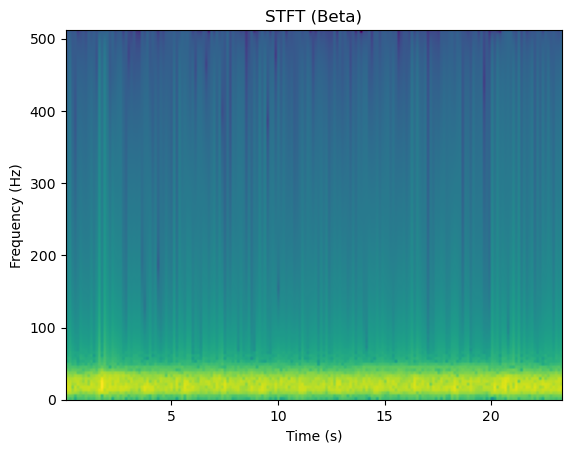

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


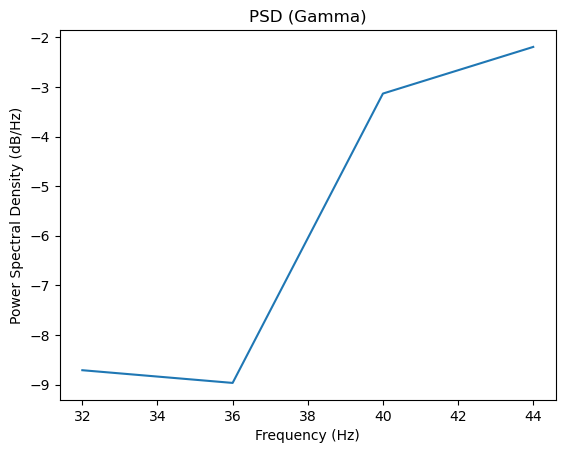

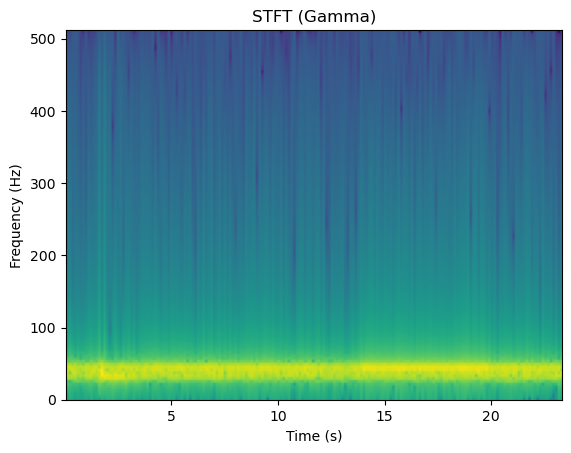

In [17]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw2.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

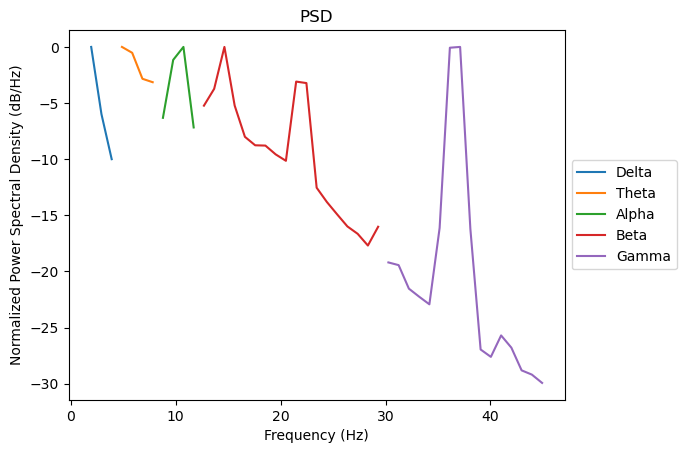

In [18]:

# Initialize the figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])

    # Convert the DataFrame to a numpy array
    data_array = df_participant2.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Normalize PSD by dividing by the sum of all PSD values
    normalized_psd = psd.mean(axis=0) / np.sum(psd.mean(axis=0))
    normalized_psd /= np.max(normalized_psd)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(normalized_psd), label=band, color=plt.cm.tab10(i))

# Add a legend and labels outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Show the figure
plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


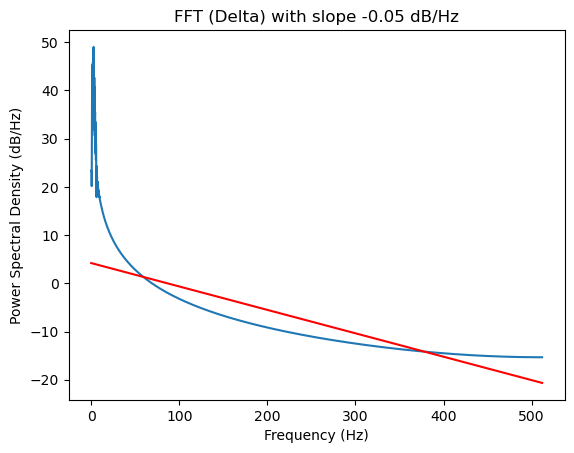

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


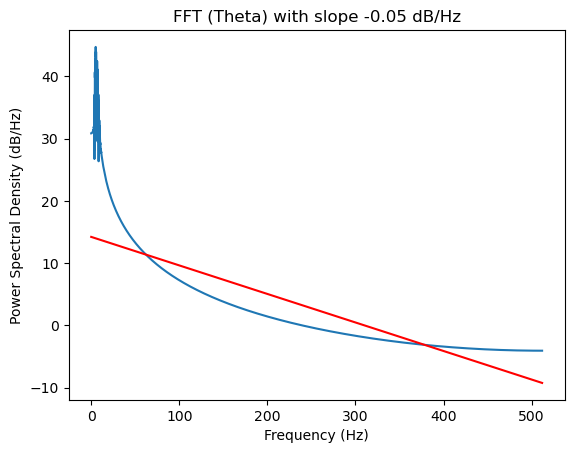

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


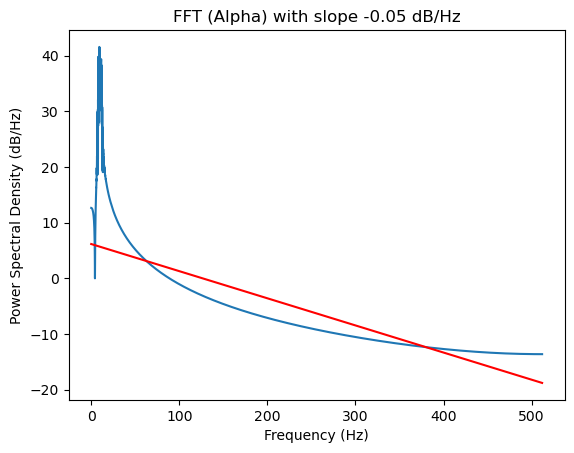

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


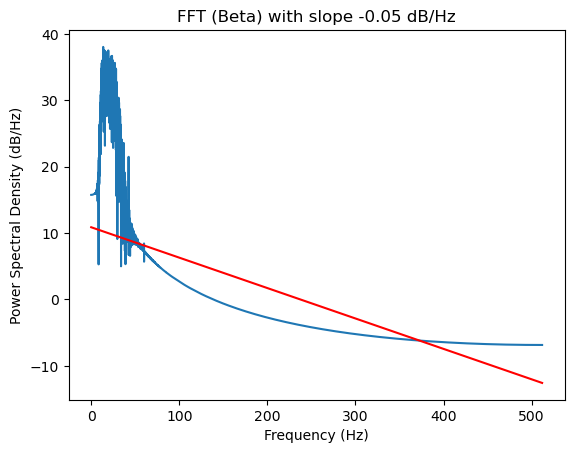

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


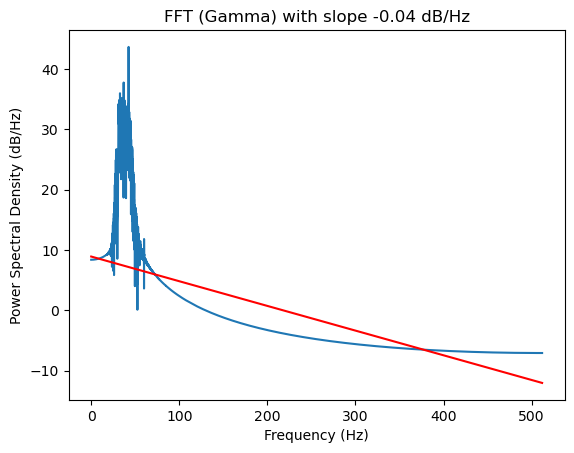

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw2.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

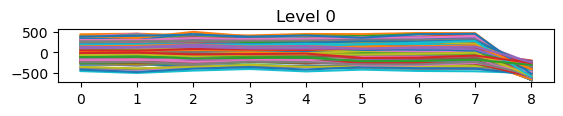

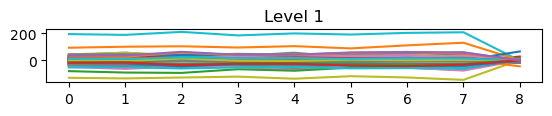

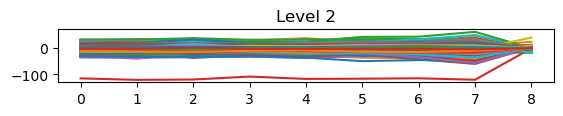

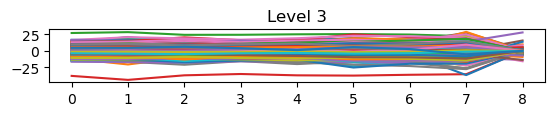

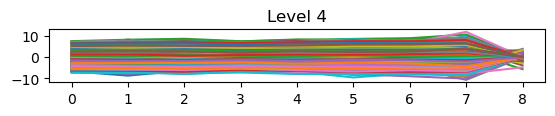

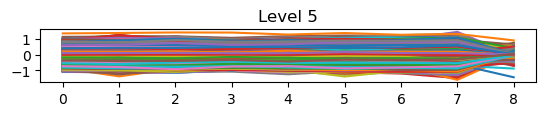

mean_spectrum: [5.06611429e+04 2.71852490e+02 1.35261283e+02 3.20406384e+01
 9.67886743e+00 2.25414299e-01]
var_spectrum: [1.29982410e+10 1.01539068e+04 2.83206291e+03 1.69081796e+02
 1.23948990e+01 6.45699364e-03]


In [20]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw2.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [21]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw2.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw2.ch_names), len(raw2.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw2.ch_names, columns=raw2.ch_names)

# Print the connectivity matrix in a neat format
df_causality



F3             Fz             F4             C3             Cz  \
F3   0.000000e+00   2.819494e-02   8.100452e-01   1.315855e-01   6.745774e-01   
Fz   1.382997e-01   0.000000e+00   2.458994e-01   1.018898e-02   9.006855e-02   
F4   2.229518e-01   9.191730e-01   0.000000e+00   1.669657e-01   4.122908e-01   
C3   4.994824e-01   2.906215e-02   6.017219e-01   0.000000e+00   2.150424e-01   
Cz   9.389389e-01   1.979307e-02   9.593678e-01   7.325963e-02   0.000000e+00   
C4   7.694258e-02   4.501169e-03   2.104094e-01   4.632259e-02   1.189904e-02   
P3   7.037210e-01   1.209311e-01   8.563075e-01   8.108824e-01   2.830712e-01   
Pz   2.265666e-01   1.453393e-02   1.205004e-01   3.055972e-01   9.163920e-02   
P4  2.227569e-226  9.838457e-216  1.648244e-205  2.010462e-234  3.386030e-237   

               C4             P3             Pz        P4  
F3   5.905477e-03   2.499203e-02   4.710707e-01  0.000005  
Fz   6.844833e-04   1.754544e-03   8.932099e-02  0.000004  
F4   1.919648e-03   2.351187e-02   3.229635e-01  0.000017  
C3   1.549756e-02   6.483472e-02   8.595233e-01  0.000008  
Cz   1.606805e-02   6.024982e-03   2.134714e-01  0.000006  
C4   0.000000e+00   9.579132e-02   1.947620e-03  0.000011  
P3   5.187911e-02   0.000000e+00   3.829182e-01  0.000012  
Pz   9.156438e-01   9.868450e-01   0.000000e+00  0.000035  
P4  1.508731e-234  3.276110e-218  7.741158e-228  0.000000

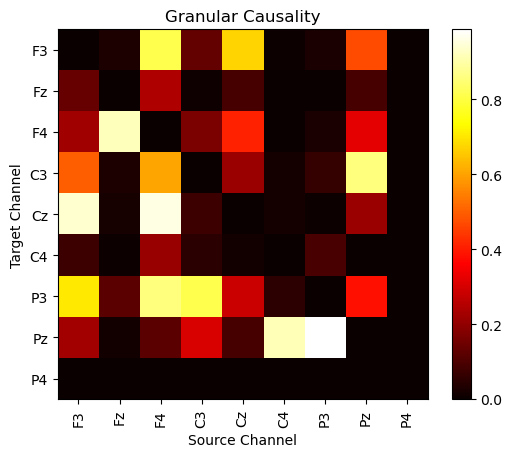

In [22]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw2.ch_names)), raw2.ch_names, rotation=90)
plt.yticks(np.arange(len(raw2.ch_names)), raw2.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()


### EMG DATA ANALYSIS - Fingure Movment data

In [23]:
# Extract columns 'col11' and 'col21' into a new DataFrame
new_df = df[['11', '21']].copy()

# Print the new DataFrame
new_df


11    21
0     -98.5 -72.0
1     -98.6 -72.9
2     -98.7 -73.9
3     -98.8 -74.6
4     -98.8 -75.0
...     ...   ...
23961  82.8 -44.1
23962  82.8 -44.1
23963  82.8 -44.0
23964  82.8 -44.0
23965  82.8 -44.1

[23966 rows x 2 columns]

In [24]:
import mne
import pandas as pd


sfreq = 1024  # Sampling frequency in Hz
ch_names = ['EMG1', 'EMG2']  # Channel names
ch_types = ['emg'] * len(ch_names)  # Channel types, set as 'emg' for EMG data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(new_df.T, info)




Creating RawArray with float64 data, n_channels=2, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.


 -------------------*********** For Band: Delta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


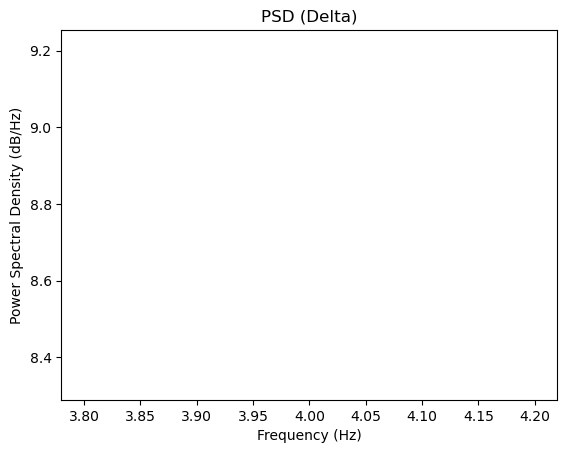

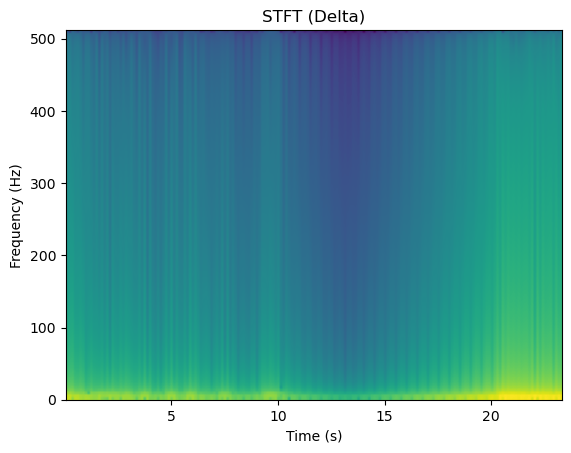

 -------------------*********** For Band: Theta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


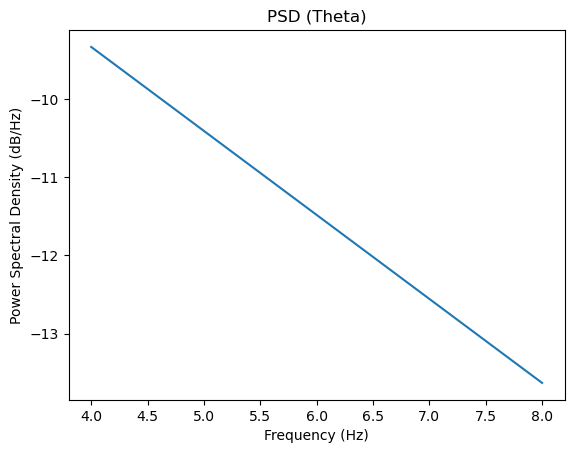

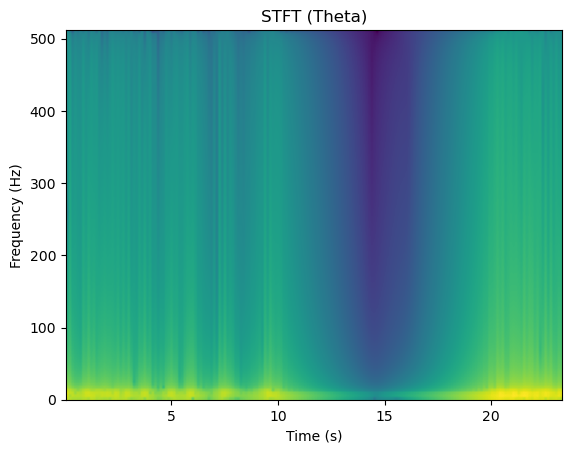

 -------------------*********** For Band: Alpha  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


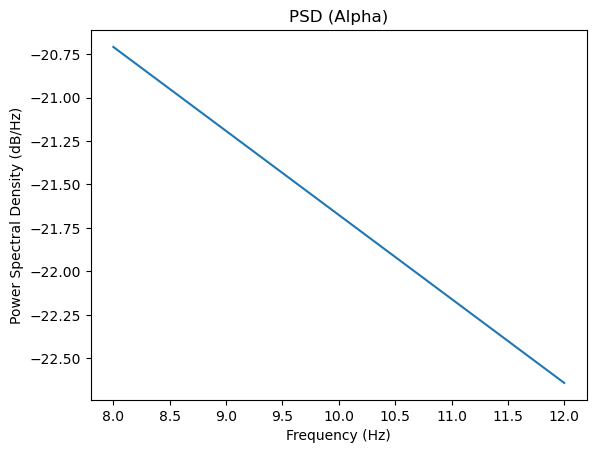

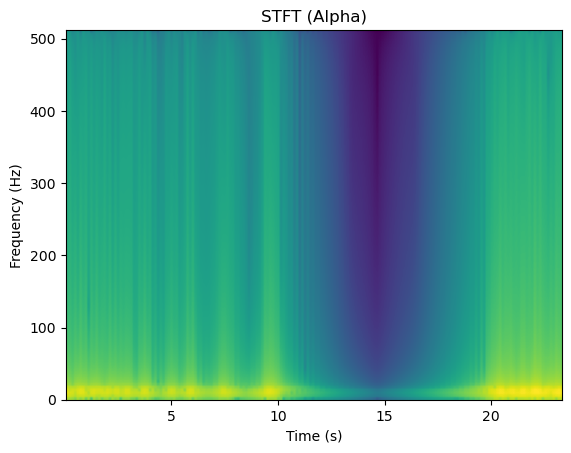

 -------------------*********** For Band: Beta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


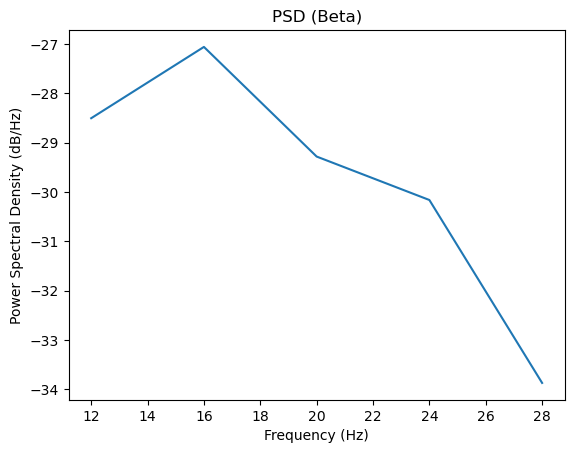

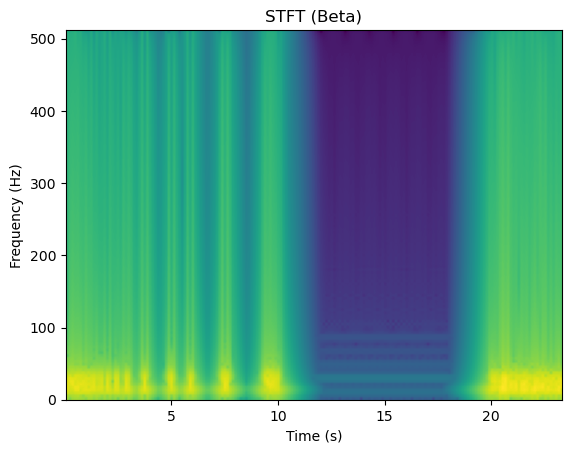

 -------------------*********** For Band: Gamma  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


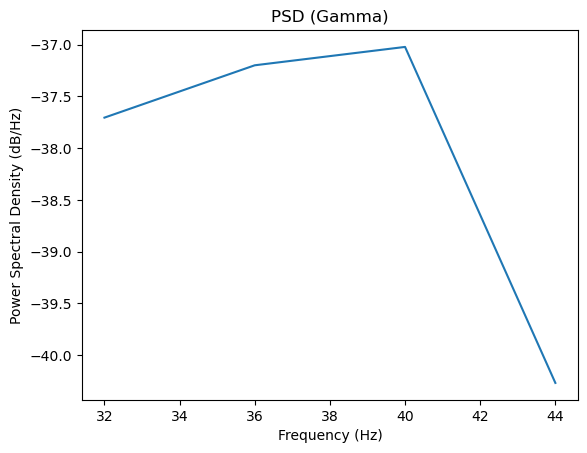

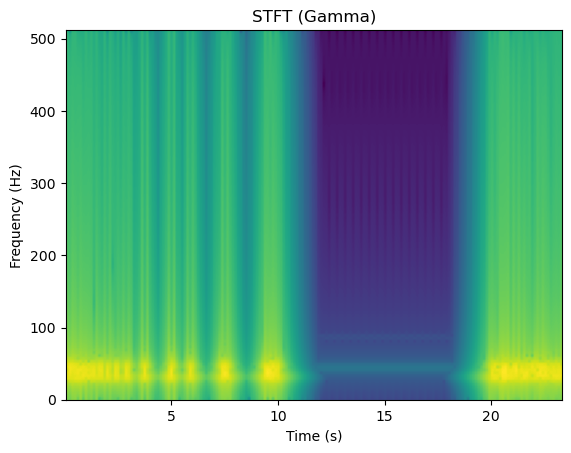

In [25]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    # Define the picks variable with the desired channel types
    #picks = mne.pick_types(raw.info, meg=False, eeg=False, emg=True)
    # Explicitly pass picks to mne.pick_types
    emg_picks = mne.pick_types(info, emg=True)
    raw_band = raw.copy().filter(fmin, fmax, picks=emg_picks, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


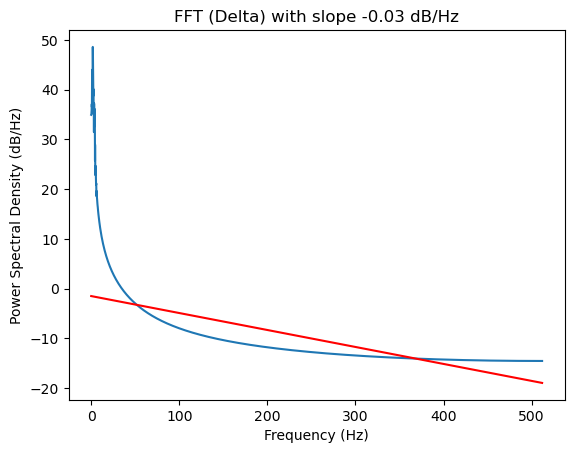

 -------------------*********** For Band: Theta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


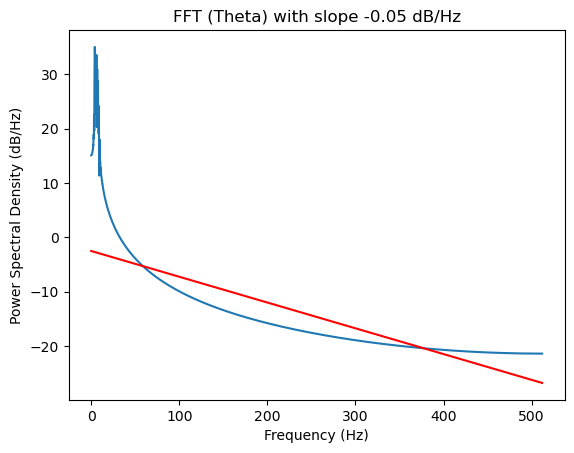

 -------------------*********** For Band: Alpha  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


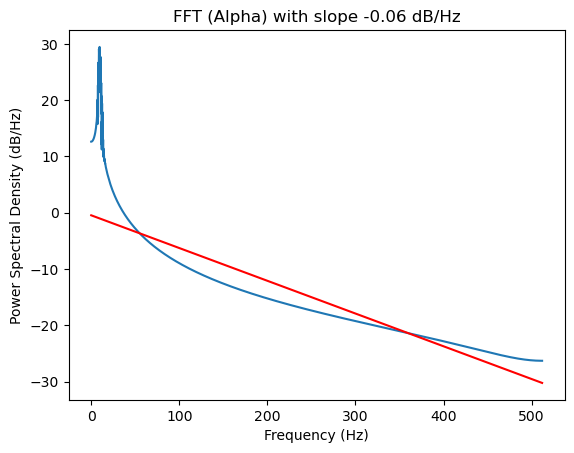

 -------------------*********** For Band: Beta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


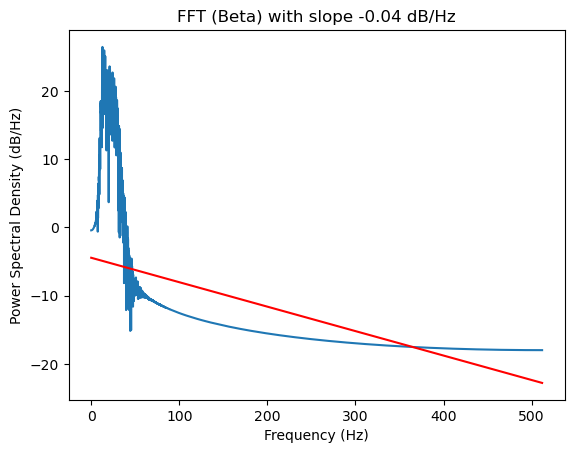

 -------------------*********** For Band: Gamma  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


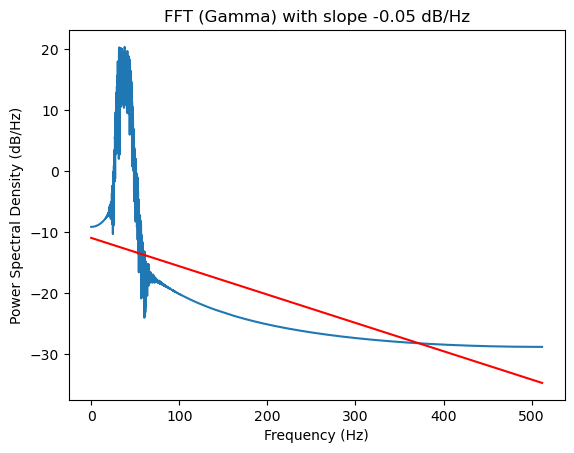

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    emg_picks = mne.pick_types(info, emg=True)
    raw_band = raw.copy().filter(fmin, fmax, picks=emg_picks, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

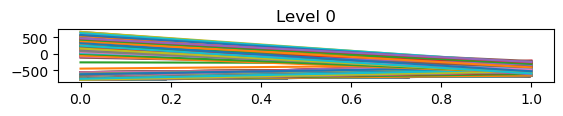

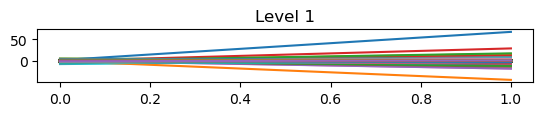

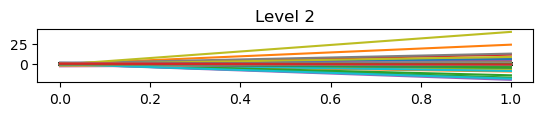

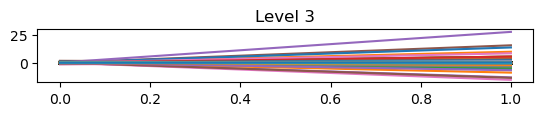

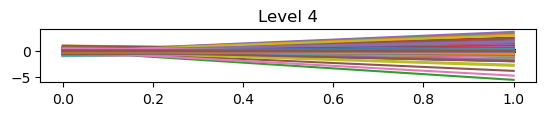

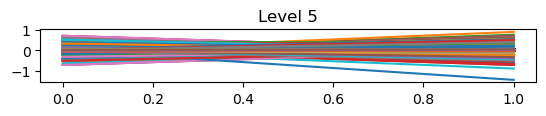

mean_spectrum: [4.55370202e+05 7.56901574e+00 1.76171173e+00 4.77332316e-01
 2.76455631e-02 3.55934227e-03]
var_spectrum: [6.76498151e+09 4.94907574e+01 2.84036004e+00 2.04739874e-01
 4.64477072e-04 4.03298091e-07]


In [27]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [28]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw.ch_names), len(raw.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw.ch_names, columns=raw.ch_names)

# Print the connectivity matrix in a neat format
df_causality

EMG1      EMG2
EMG1  0.00000  0.000011
EMG2  0.00002  0.000000

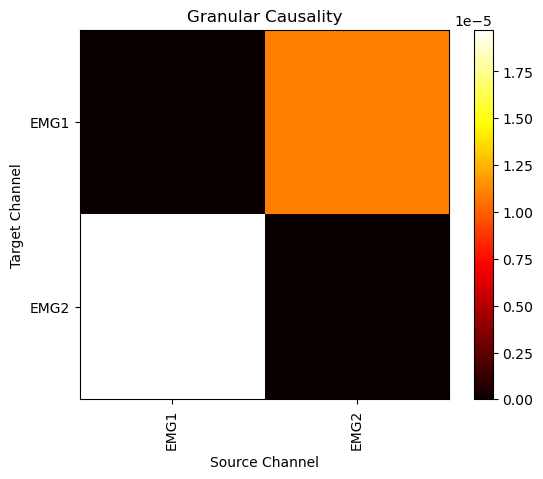

In [29]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw.ch_names)), raw.ch_names, rotation=90)
plt.yticks(np.arange(len(raw.ch_names)), raw.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()
